# 5 min Quickstart

In [21]:
import featuretools as ft
from IPython.display import display

data = ft.demo.load_mock_customer()

customers_df = data["customers"]
display(customers_df.sample(3))

sessions_df = data["sessions"]
display(sessions_df.sample(10))

transactions_df = data["transactions"]
display(transactions_df.sample(10))

,customer_id,zip_code,join_date,birthday
3,4,60091,2011-04-08 20:08:14,2006-08-15
2,3,13244,2011-08-13 15:42:34,2003-11-21
0,1,60091,2011-04-17 10:48:33,1994-07-18


,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
29,30,5,desktop,2014-01-01 07:27:25
18,19,3,desktop,2014-01-01 04:27:35
5,6,1,tablet,2014-01-01 01:23:25
23,24,5,tablet,2014-01-01 05:44:30
15,16,2,desktop,2014-01-01 03:49:40
14,15,2,desktop,2014-01-01 03:41:00
28,29,1,mobile,2014-01-01 07:10:05


,transaction_id,session_id,transaction_time,product_id,amount
74,417,5,2014-01-01 01:20:10,1,139.20
231,229,17,2014-01-01 04:10:15,2,90.79
434,127,31,2014-01-01 07:50:10,3,62.35
420,359,30,2014-01-01 07:35:00,3,72.70
54,249,4,2014-01-01 00:58:30,4,43.59
396,369,28,2014-01-01 07:09:00,5,44.11
251,350,19,2014-01-01 04:31:55,1,24.68
248,79,19,2014-01-01 04:28:40,2,68.63
95,383,7,2014-01-01 01:42:55,1,74.41
421,360,30,2014-01-01 07:36:05,1,68.85


**1:m relationship**: "1" is the parent dataframe, "m" is the son dataframe.
The relationship between *parent* and *child* is defined like this

```
(parent_dataframe, parent_column, child_dataframe, child_column)
```

The transactions table is on transaction_id level. Multiple transactions may be associated with a single session
This means that transactions have a relation many-to-one with sessions.
- one = session_id = parent_column
- many = transaction_id = child_column

```python
(sessions_df, "session_id", transactions_df, "transaction_id")
```

The sessions table is on session_id level. Each session is associated with a single customer. 
A customer may have multiple sessions. This means a customer may have multiple sessions.
This implies customer have a relationship one-to-many with sessions
- one = customer_id = parent_column
- many = session_id = child_column

```python
(customers_df, "customer_id", sessions_df, "session_id")
```



In [9]:
dataframes = {
    "customers": (customers_df, "customer_id"),
    "sessions": (sessions_df, "session_id", "session_start"),
    "transactions": (transactions_df, "transaction_id", "transaction_time"),
}

relationships = [
    ("sessions", "session_id", "transactions", "session_id"),
    ("customers", "customer_id", "sessions", "customer_id"),
]

feature_matrix_customers, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="customers",
)
feature_matrix_customers

/Users/r.de.9/mlearn/venv/lib/python3.12/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/r.de.9/mlearn/venv/lib/python3.12/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/r.de.9/mlearn/venv/lib/python3.12/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/r.de.9/mlearn/venv/lib/python3.12/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each eleme

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


<Feature: MAX(sessions.COUNT(transactions))>
The maximum of the number of all instances of "transactions" for each "session_id" in "sessions" of all instances of "sessions" for each "customer_id" in "customers".


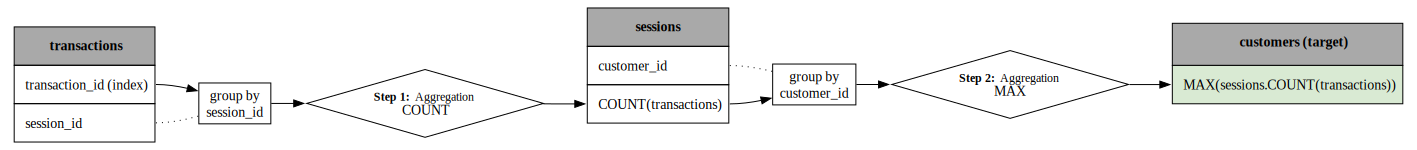

In [16]:
feature = features_defs[21]
print(feature)

print(ft.describe_feature(feature))
ft.graph_feature(feature)


# Entity Set

In [31]:
import featuretools as ft

data = ft.demo.load_mock_customer()
transactions_df = data["transactions"]
display(transactions_df.sample(10))

#.merge(data["sessions"]).merge(data["customers"])
products_df = data["products"]
display(products_df.sample(5))

sessions_df = data["sessions"]
display(sessions_df.sample(10))

customers_df = data["customers"]
display(customers_df.sample(5))

,transaction_id,session_id,transaction_time,product_id,amount
264,296,20,2014-01-01 04:46:00,5,53.22
19,74,2,2014-01-01 00:20:35,1,106.99
314,141,23,2014-01-01 05:40:10,5,128.26
290,236,21,2014-01-01 05:14:10,5,57.09
379,292,28,2014-01-01 06:50:35,1,133.71
335,482,25,2014-01-01 06:02:55,1,26.30
293,452,21,2014-01-01 05:17:25,5,69.62
271,169,20,2014-01-01 04:53:35,3,78.87
404,476,29,2014-01-01 07:17:40,4,11.62
179,72,12,2014-01-01 03:13:55,2,143.96


,product_id,brand
3,4,B
2,3,B
4,5,A
0,1,B
1,2,B


,session_id,customer_id,device,session_start
1,2,5,mobile,2014-01-01 00:17:20
8,9,1,desktop,2014-01-01 02:15:25
22,23,3,desktop,2014-01-01 05:32:35
33,34,3,desktop,2014-01-01 08:24:50
13,14,1,tablet,2014-01-01 03:28:00
2,3,4,mobile,2014-01-01 00:28:10
14,15,2,desktop,2014-01-01 03:41:00
21,22,4,desktop,2014-01-01 05:21:45
31,32,5,mobile,2014-01-01 08:02:05
12,13,4,mobile,2014-01-01 03:15:00


,customer_id,zip_code,join_date,birthday
3,4,60091,2011-04-08 20:08:14,2006-08-15
2,3,13244,2011-08-13 15:42:34,2003-11-21
1,2,13244,2012-04-15 23:31:04,1986-08-18
4,5,60091,2010-07-17 05:27:50,1984-07-28
0,1,60091,2011-04-17 10:48:33,1994-07-18


In [52]:
from woodwork.logical_types import Categorical, PostalCode

es = ft.EntitySet(id="customer_data")

es.add_dataframe(
    dataframe_name="transactions",
    dataframe=transactions_df,
    index="transaction_id",
    time_index="transaction_time",
    logical_types={
        "product_id": Categorical,
    }
)

es.add_dataframe(
    dataframe_name="products",
    dataframe=products_df,
    index="product_id",
    logical_types={
        "product_id": Categorical,
    }
)

es.add_dataframe(
    dataframe_name="sessions",
    dataframe=sessions_df,
    index="session_id",
    # logical_types={
    #     "customer_id": Categorical,
    # }
)

es.add_dataframe(
    dataframe_name='customers',
    dataframe=customers_df,
    index='customer_id',
    logical_types={
        "zip_code": PostalCode,
    }
)

es = es.add_relationship("products", "product_id", "transactions", "product_id")
es = es.add_relationship("customers", "customer_id", "sessions", "customer_id")
es = es.add_relationship("sessions", "session_id", "transactions", "session_id")

es

Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 4]
  Relationships:
    transactions.product_id -> products.product_id
    sessions.customer_id -> customers.customer_id
    transactions.session_id -> sessions.session_id

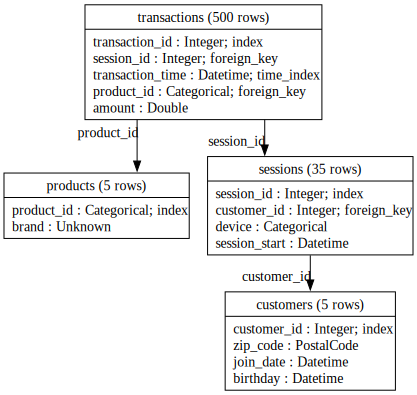

In [55]:
es.plot()